## Camera Calibration
Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

[[ -2.41017956e-01  -5.30721173e-02  -1.15810355e-03  -1.28318856e-04
    2.67125290e-02]]
[[  1.15396093e+03   0.00000000e+00   6.69705357e+02]
 [  0.00000000e+00   1.14802496e+03   3.85656234e+02]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]


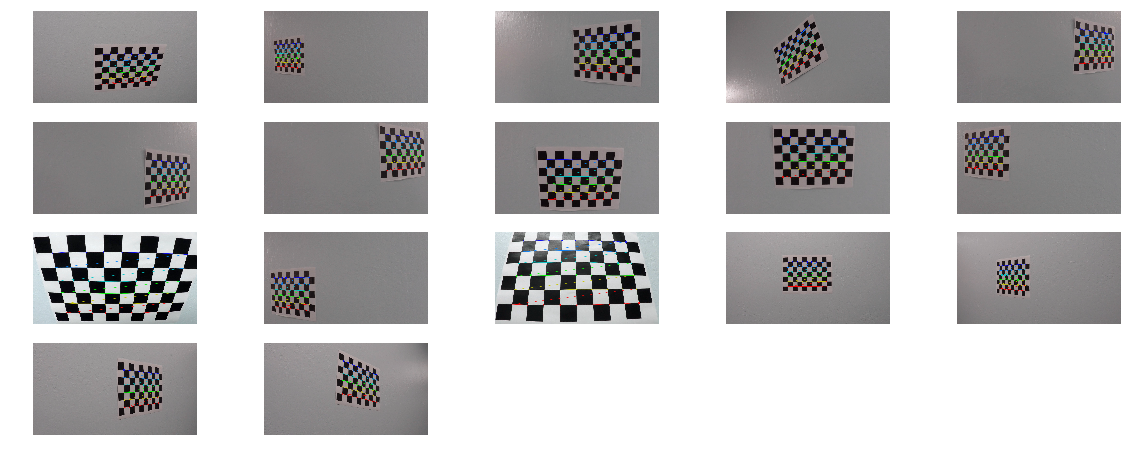

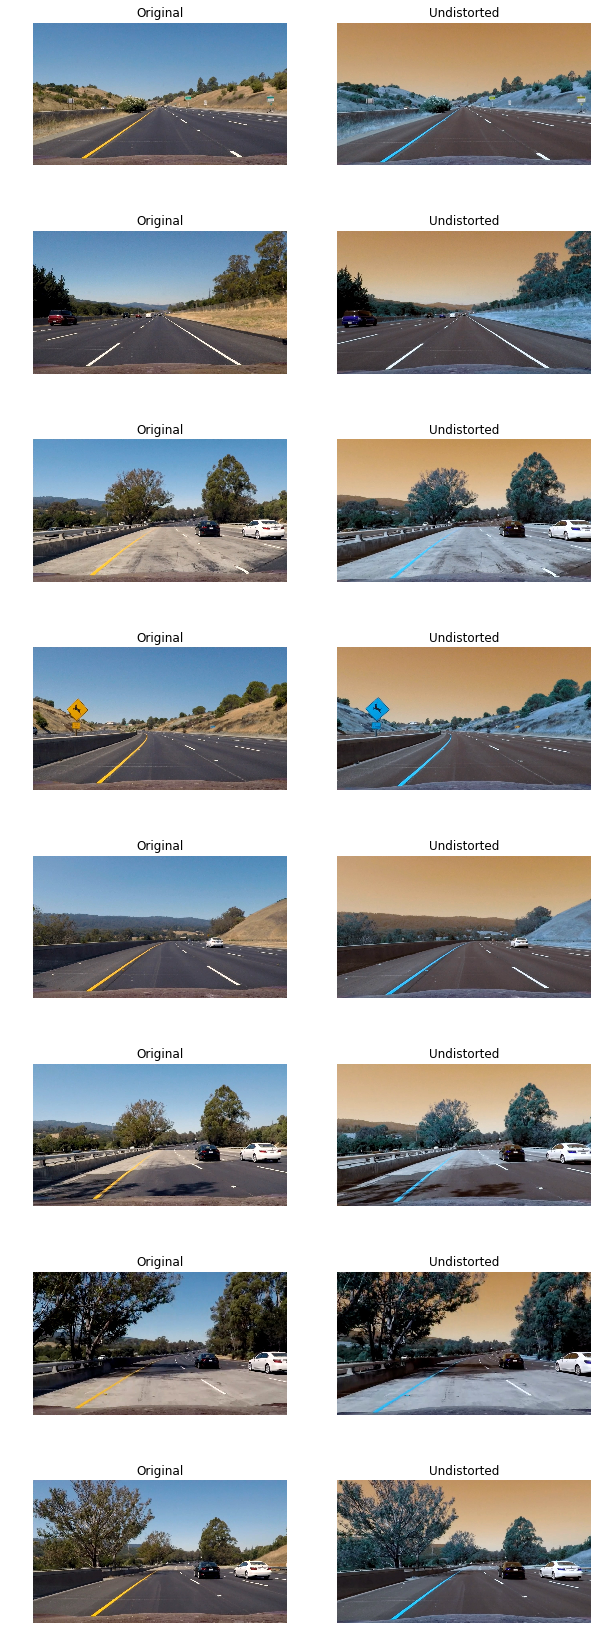

In [53]:
# Camera Calibration
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# Prepare object points, like (0,0,0), (1,0,0), (2,0,0) ...., (6,5,0)
objp = np.zeros((6*9, 3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
i = 1
fig = plt.figure(figsize=(20, 20))
for fname in images:
    
    # Read image and convert to greyscale
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9, 6), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        image = cv2.drawChessboardCorners(img, (9, 6), corners, ret)
        fig.add_subplot(10, 5, i)
        plt.imshow(image)
        plt.axis('off')
        i += 1
        
# Calculate camera calibration matrix based on all points calculated
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# Output distortion coefficients and camera matrix to see if they're sane
print( dist )
print( mtx )
# Test out some crazy distortion coefficient to make sure our code is working.
# dist[0] = 2

# Make a list of calibration images
images = glob.glob('test_images/*.jpg')

# Undistort test images
i = 1
fig = plt.figure(figsize=(10, 30))
for fname in images:
    # Show original
    image = cv2.imread( fname )
    fig.add_subplot(8, 2, i)
    image = cv2.cvtColor( image, cv2.COLOR_BGR2RGB )
    plt.imshow(image)
    plt.axis('off')
    plt.title( "Original" )
    i += 1
    
    # Undistort
    output_image = cv2.undistort(image, mtx, dist, mtx)
    fig.add_subplot(8, 2, i)
    output_image = cv2.cvtColor( output_image, cv2.COLOR_BGR2RGB )
    plt.imshow(output_image)
    plt.axis('off')
    plt.title( "Undistorted" )
    i += 1


## Distortion correction
Apply a distortion correction to raw images.


In [13]:
# Distortion correction


## Color transforms
Use color transforms, gradients, etc., to create a thresholded binary image.


In [14]:
# Color transforms



## Perspective transforms
Apply a perspective transform to rectify binary image (birds-eye view).


In [5]:
# Perspective transforms


## Detect pixels
Detect lane pixels and fit to find the lane boundary.


In [7]:
# Detect pixels


## Determine curvature
Determine the curvature of the lane and vehicle position with respect to center.


In [11]:
# Determine curvature


## Warp
Warp the detected lane boundaries back onto the original image.


In [12]:
# Warp


## Display
Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [10]:
# Display


## Extra challenge 


In [16]:
# Extra challenge 


## Harder challenge


In [ ]:
# Harder challenge
